In [9]:
################################
# LIBRARIES
################################
from functionshelper import *
from functionssessions import *

import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib settings
plt.style.use("seaborn")

params = {
    "font.family": "STIXGeneral",
    "mathtext.fontset": "stix",
    "axes.labelsize": 20,
    "legend.fontsize": 20,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "text.usetex": False,
    "figure.figsize": [10, 5],
    "axes.grid": True,
}

plt.rcParams.update(params)
plt.close("all")

# Apply the default theme
sns.set_theme()

%matplotlib inline

In [10]:
s_df = get_computed_sessions()
r_df = combine_raw_session_dfs()

r_df.drop("Unnamed: 0", axis=1, inplace=True)

session_ids = sorted(list(r_df["Session Id"].unique()))

KeyError: "['Unnamed: 0'] not found in axis"

In [11]:

t = s_df.loc[s_df.Station == 'Rådmansgatan']
t = t.sort_values(by=['PM2.5'], ascending=False)

3.66
1.29
0.6199999999999999
0.73
1.1099999999999999
1.1799999999999997
0.6299999999999999
1.2899999999999998
1.37
0.74
1.0799999999999998
1.34
2.12
1.7299999999999998
0.56
0.51
6.280000000000001
6.41
6.75
5.100000000000001
22.8
21.570000000000004


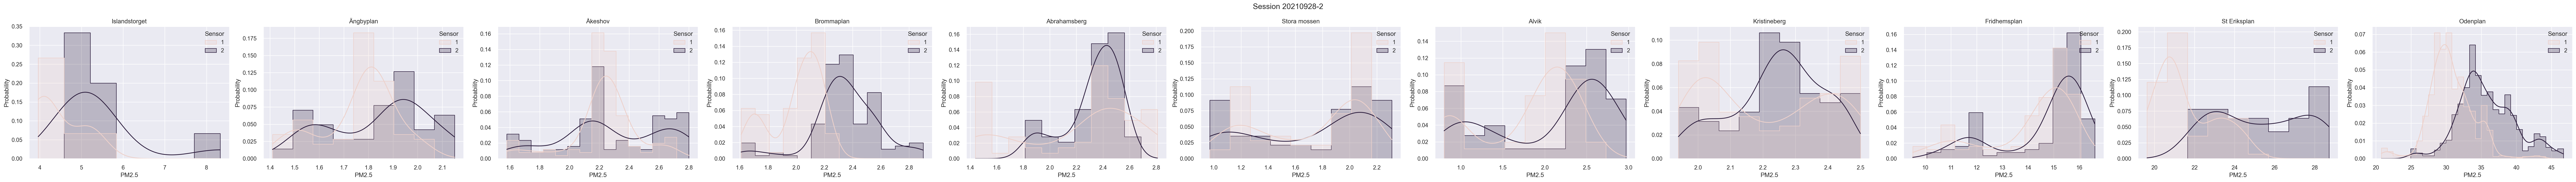

In [210]:
for s_id in session_ids[4:5]:
    session_df = r_df.loc[r_df['Session Id'] == s_id]

    stations = list(session_df['Station'].unique())

    fig, axs = plt.subplots(ncols=len(stations), figsize=[70,5], dpi=200)

    for i, station in enumerate(stations):
        station_df = session_df.loc[session_df['Station'] == station]
        sensors = list(station_df['Sensor'].unique())

        session_row = s_df.loc[(s_df['Session Id'] == s_id) & (s_df['Station'] == station)]
        session_value = session_row['PM2.5'].values[0]
        
        
        sns.histplot(station_df, x='PM2.5', hue='Sensor', stat='probability', element='step', kde=True, ax=axs[i])
        #sns.displot(station_df, x='PM2.5', y='Sensor')
        #sns.displot(station_df, x='PM2.5', hue='Sensor', stat='probability', element='step')
        #sns.displot(station_df, x='PM2.5', hue='Sensor', stat='probability')
        #sns.displot(station_df, x='PM2.5', hue='Sensor', multiple='stack', stat='probability')
        #sns.displot(station_df, x='PM2.5', kind='kde', hue='Sensor', fill='true', bw_adjust=0.8)
        #plt.title(station)
        #plt.axvline(session_value)

        axs[i].set_title(station)

        
        for j, sensor in enumerate(sensors):
            sensor_df = station_df.loc[station_df['Sensor'] == sensor]

            max_pm = sensor_df['PM2.5'].max()
            min_pm = sensor_df['PM2.5'].min()

            diff = abs(max_pm - min_pm)
            print(diff)

            # Get normal distribution for sensor
            #sns.displot(sensor_df, x='PM2.5', bins=15)
            #plt.title(sensor)

    fig.suptitle(f'Session {s_id}', fontsize=15)
    #plt.tight_layout()
    #plt.savefig(f'figures/PaperV1/distribution_{s_id}.pdf')
        


In [235]:
diffs = {}

for s_id in session_ids:
    session_df = r_df.loc[r_df['Session Id'] == s_id]

    stations = list(session_df['Station'].unique())

    for i, station in enumerate(stations):
        station_df = session_df.loc[session_df['Station'] == station]
        sensors = list(station_df['Sensor'].unique())

        session_row = s_df.loc[(s_df['Session Id'] == s_id) & (s_df['Station'] == station)]
        session_value = session_row['PM2.5'].values[0]

        if station not in diffs:
            diffs[station] = {}

        for j, sensor in enumerate(sensors):

            if str(sensor) not in diffs[station]:
                diffs[station][str(sensor)] = []

            sensor_df = station_df.loc[station_df['Sensor'] == sensor]

            max_pm = sensor_df['PM2.5'].max()
            min_pm = sensor_df['PM2.5'].min()

            diff = abs(max_pm - min_pm)

            diffs[station][str(sensor)].append(diff)


s_name = 'Odenplan'
s_list = list(diffs[s_name].keys())
d_list = []

for s in sorted(s_list):
    d = np.array(diffs[s_name][s])
    d_avg = np.average(d)
    d_list.append(d_avg)

    print(f'{s}: {d_avg}')

print(f'Total Average: {np.average(d_list)}')
print(f'Total Median: {np.median(d_list)}')

1: 6.430714285714286
2: 7.968571428571427
3: 5.17
4: 4.788333333333333
5: 4.144
6: 5.163999999999999
A: 4.106
B: 6.9628571428571435
C: 4.383333333333334
D: 4.381666666666667
E: 4.251666666666668
Total Average: 5.250103896103895
Total Median: 4.788333333333333


In [228]:
# Titta på distributions för controlled settings där saker inte ändras:
# Detta för att se hur bra sensorerna verkar vara i kontrollerade former
# Att det förändras mycket på stationerna kan vara på grund av att det faktiskt förändras på plattformen medan man är där. Ex. på grund av tåg som kommer in! Kan få förhöjda nivåer etc.

<ipython-input-234-800d44a92491>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_r_df['Sensor'] = s_r_df['Sensor'].astype(str)


<AxesSubplot:xlabel='PM2.5', ylabel='Probability'>

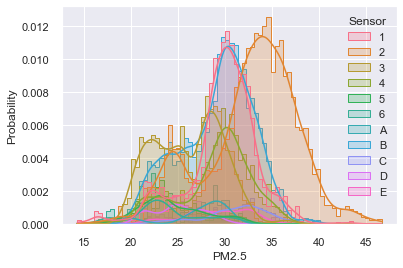

In [234]:
s_r_df = r_df.loc[r_df['Station'] == 'Odenplan']
s_r_df['Sensor'] = s_r_df['Sensor'].astype(str)
s_r_df = s_r_df.sort_values(by=['Sensor'])

sns.histplot(s_r_df, x='PM2.5', hue='Sensor', stat='probability', element='step', kde=True)

In [12]:
# Look at calibration data from 2021-10-02

def format_time(date, time_int):
    # convert int to str
    str_time = str(time_int)
    
    # Pad 5:00:00 to 05:00:00
    if len(str_time) < 6:
        str_time = '0' + str_time
    
    # Concatenate date and time
    str_time = date + ' ' + str_time
    
    # Convert string into date time object
    result = datetime.strptime(str_time, '%Y-%m-%d %H%M%S')
    
    return result

def get_sensor_dfs(date, sensors, period):
    # Load data
    dfs = []
    labels = []

    dir_files = os.listdir(f'by-date-filtered/{date}/')
    data_files = []
    
    for file in dir_files:
        if (file[0] in sensors) and (file.endswith(f'{period}.csv')):
            data_files.append(file)

    data_files.sort()        

    # Add timestamps column
    for file in data_files:
        df = pd.read_csv(f'by-date-filtered/{date}/{file}', skiprows=1)
        df['Timestamp'] = df['Time'].apply(lambda x: format_time(date, x) + timedelta(hours=2))

        # Add label column
        df['Sensor'] = file[0]

        dfs.append(df)

        labels.append(file.split('-')[0])
        
    return dfs, labels, data_files

In [17]:
dfs, labels, data_files = get_sensor_dfs('2021-10-02',['1', '2', '3', '4', 'B', 'E'] , 'Kalibrering')

dfs[5] = dfs[5][(dfs[5]['Timestamp'] > '2021-10-02 15:00:00')]

dfs = [df.iloc[150:] for df in dfs]
dfs = [df[(df['Timestamp'] >= '2021-10-02 16:00:00') & (df['Timestamp'] <= '2021-10-02 16:10:00')] for df in dfs]

for i in range(len(dfs)):
    dfs[i]['Sensor'] = labels[i]

# combine
sensor_dfs = pd.concat(dfs)
sensor_dfs.reset_index(drop=True, inplace=True)

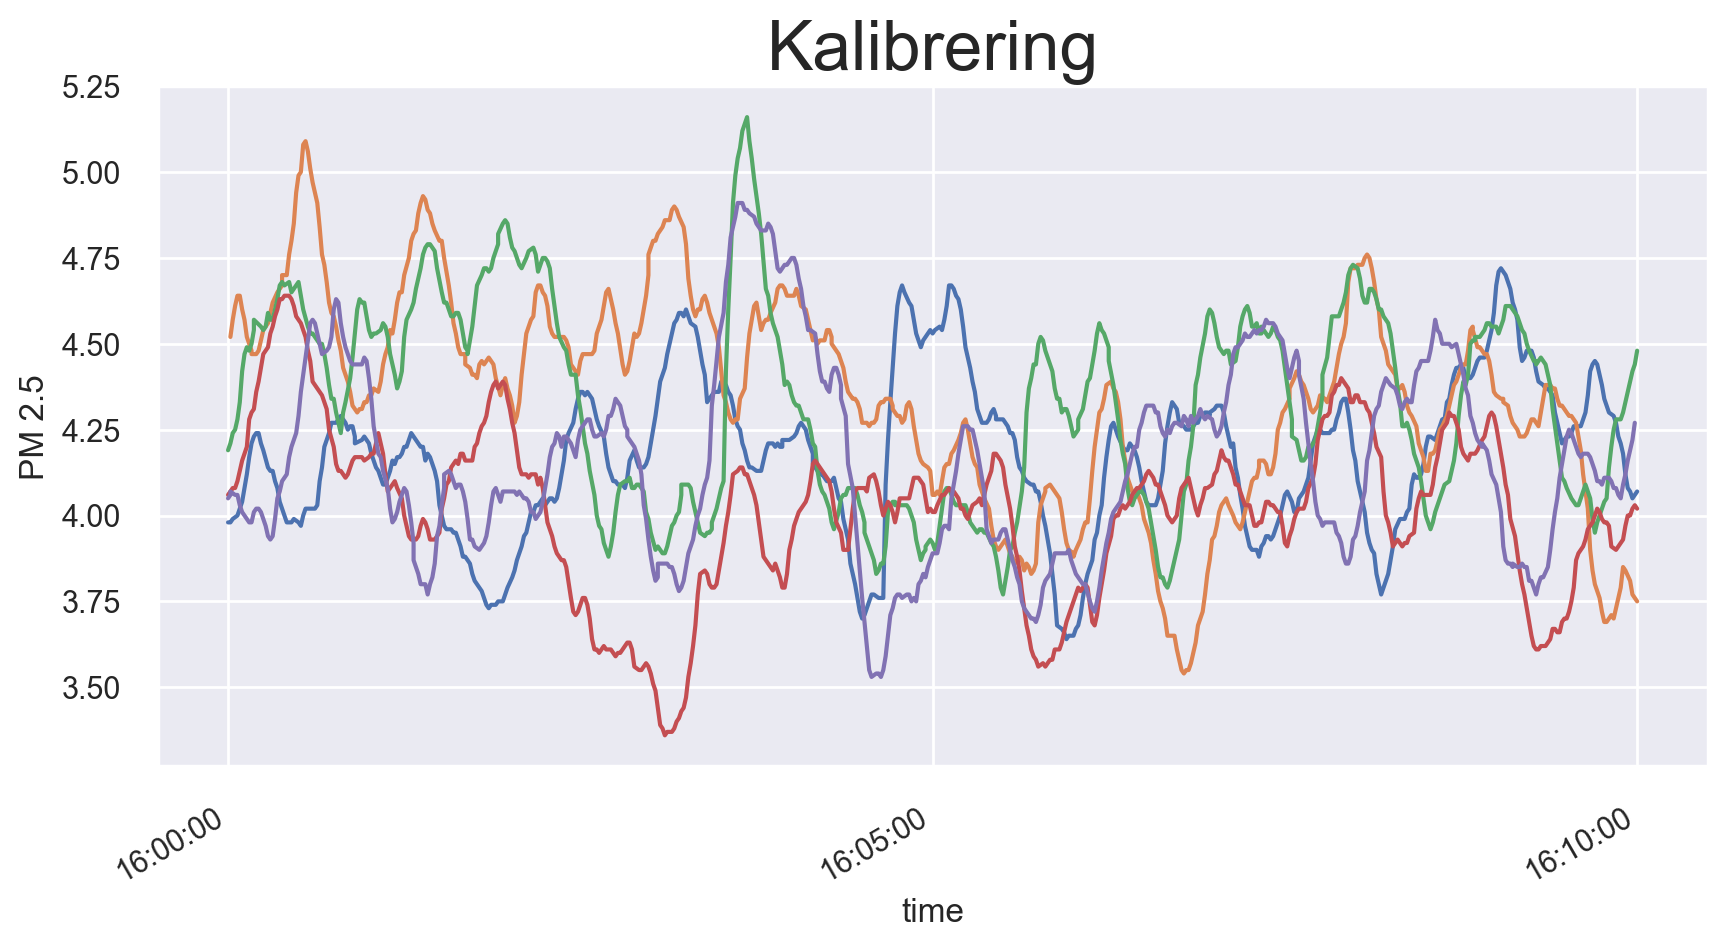

In [18]:
# Plot
fig, ax = plt.subplots(dpi=200, figsize = (10, 5))

for i, df in enumerate(dfs):
    ax.plot(df['Timestamp'], df['PM2.5'], label=f'Sensor {labels[i]}')

# Label axis
ax.set_title('Kalibrering', fontsize=25)
ax.set_xlabel('time')
ax.set_ylabel('PM 2.5')

# Format time on x-axis
plt.gcf().autofmt_xdate()
myFmt = dates.DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_formatter(myFmt)

# Show
plt.show()

<AxesSubplot:xlabel='PM2.5', ylabel='Count'>

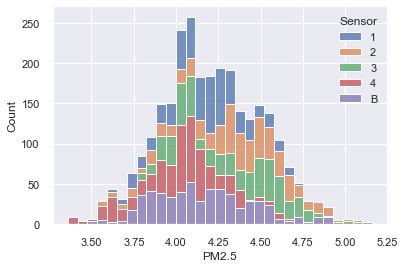

In [96]:

#sns.histplot(sensor_dfs, x='PM2.5', hue='Sensor', stat='probability', element='step', kde=True) 
sns.histplot(sensor_dfs, x='PM2.5', hue='Sensor', multiple='stack') # keeper

0.15027407678690508


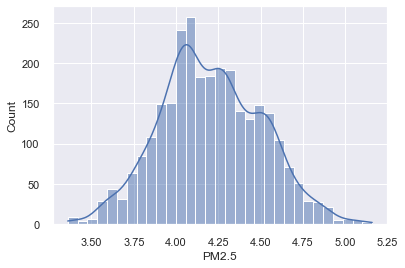

In [20]:
group_df = sensor_dfs.groupby('Timestamp').mean().reset_index()

sns.histplot(sensor_dfs, x='PM2.5', kde=True)

mean = group_df['PM2.5'].mean()
std = group_df['PM2.5'].std()

print(std)

0.2906787194898092
0.5813574389796184
0.012261541731377492


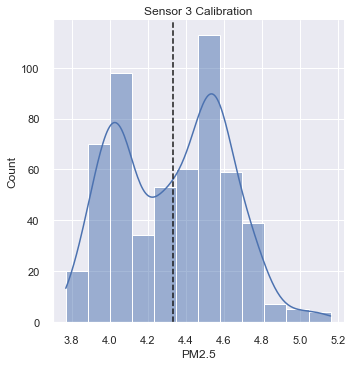

In [98]:
s = 2

mean = dfs[s]['PM2.5'].mean()
std = dfs[s]['PM2.5'].std()
N = len(dfs[s])

mean_std = std / np.sqrt(N)

print(std)
print(2 * std)
print
print(mean_std)

sns.displot(dfs[s], x='PM2.5', kde=True)
plt.title(f'Sensor {labels[s]} Calibration')
plt.axvline(mean, c='k', linestyle='--')
# plt.axvline(mean + 2*std, c='k', linestyle='--')
# plt.axvline(mean - 2*std, c='k', linestyle='--')

In [82]:
# Get mean, min, and max for all sensor values
group2_df = sensor_dfs.groupby('Timestamp').agg({'PM2.5': ['mean', 'min', 'max']}).reset_index()

# Average distance between smallest recorded value and highest recorded value for different sensors at every measurement point
mean_diff = np.mean(group2_df['PM2.5']['max'] - group2_df['PM2.5']['min'])

# Only 0.64 difference!
print(mean_diff)

0.6418635607321131


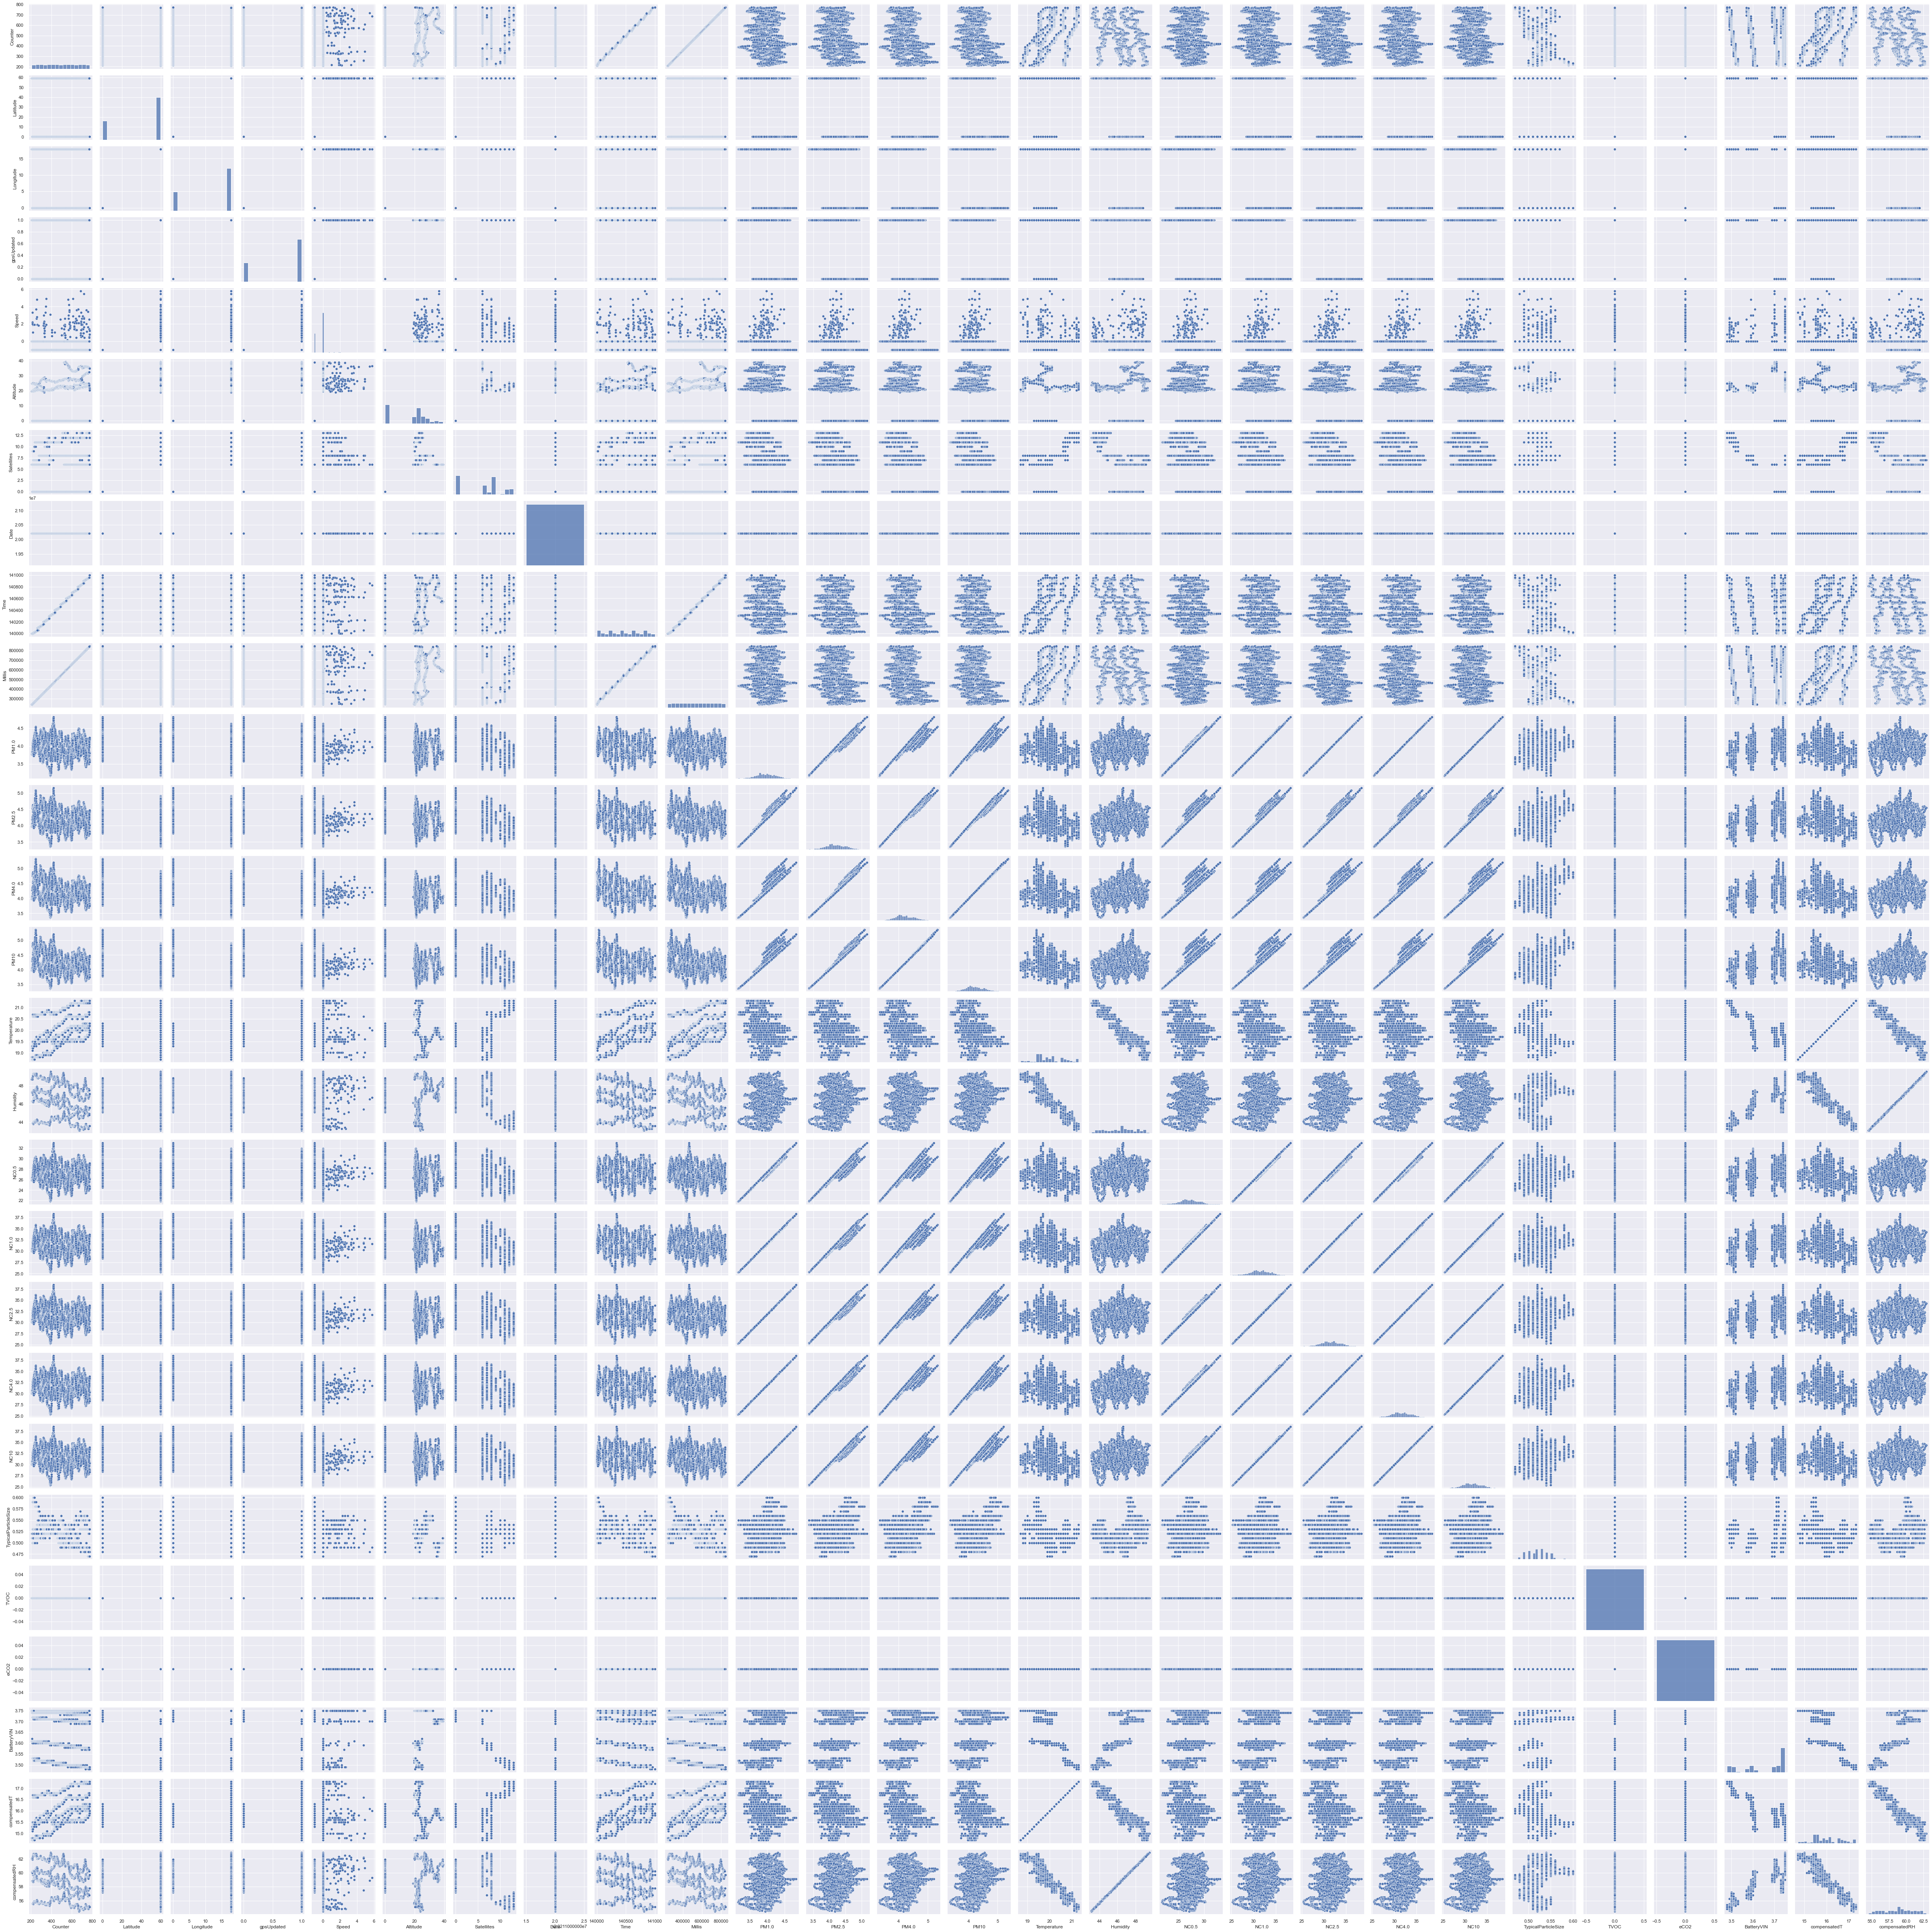

In [76]:
sns.pairplot(sensor_dfs)
# plt.savefig('figures/PaperV1/pairplot.pdf', dpi=300)

# sns.displot(sensor_dfs, hue='Sensor', x='Humidity', y='Temperature', kind='kde')
# sns.jointplot(data=sensor_dfs, x='PM2.5', y='Humidity', hue='Sensor', kind='kde')

In [36]:
dfs[0][['PM2.5', 'Timestamp']].head(20)

PM2.5           Timestamp
208   3.98 2021-10-02 16:00:00
209   3.98 2021-10-02 16:00:01
210   3.99 2021-10-02 16:00:02
211   4.00 2021-10-02 16:00:04
212   4.02 2021-10-02 16:00:05
213   4.04 2021-10-02 16:00:06
214   4.08 2021-10-02 16:00:07
215   4.12 2021-10-02 16:00:08
216   4.17 2021-10-02 16:00:09
217   4.21 2021-10-02 16:00:10
218   4.23 2021-10-02 16:00:11
219   4.24 2021-10-02 16:00:12
220   4.24 2021-10-02 16:00:13
221   4.21 2021-10-02 16:00:14
222   4.19 2021-10-02 16:00:15
223   4.14 2021-10-02 16:00:17
224   4.13 2021-10-02 16:00:18
225   4.13 2021-10-02 16:00:19
226   4.10 2021-10-02 16:00:20
227   4.08 2021-10-02 16:00:21

In [81]:
c_df = sensor_dfs.groupby('Timestamp').agg({'PM2.5': ['min', 'max', 'mean']}).reset_index()

c_df

Timestamp PM2.5              
                          min   max    mean
0   2021-10-02 16:00:00  3.98  4.19  4.0700
1   2021-10-02 16:00:01  3.98  4.52  4.1680
2   2021-10-02 16:00:02  3.99  4.57  4.2200
3   2021-10-02 16:00:03  4.06  4.61  4.2500
4   2021-10-02 16:00:04  4.00  4.64  4.2160
..                  ...   ...   ...     ...
596 2021-10-02 16:09:56  4.00  4.36  4.1500
597 2021-10-02 16:09:57  3.81  4.19  4.0175
598 2021-10-02 16:09:58  3.77  4.42  4.0960
599 2021-10-02 16:09:59  3.76  4.44  4.1120
600 2021-10-02 16:10:00  3.75  4.48  4.0800

[601 rows x 4 columns]

In [171]:
### CALIBRATION AI SWEDEN
def get_timestamp(timestr, date, offset=0):
    return datetime.strptime(f'{date} {timestr}', '%Y-%m-%d %H:%M:%S') + timedelta(seconds=offset)

# Store all raw session dataframes in array
calibrate_dfs = []

# Get session files in folder
folder = 'later-data/KalibreringAISweden/'
session_files = sorted(os.listdir(folder))

for i, file_name in enumerate(session_files):

    # Read individual sensor data
    raw_df = pd.read_csv(folder + '/' + file_name, skiprows=1)
    raw_df['Sensor'] = str(file_name[0])
    raw_df['Timestamp'] = raw_df['Time'].apply(lambda x: format_time('2021-12-14', x) + timedelta(hours=2))

    # Remove first 150 rows and last 30 rows
    raw_df = raw_df[150:]
    raw_df = raw_df[:-30]

    # Convert timestamp string column into datetime
    #raw_df["Timestamp"] = raw_df["Timestamp"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

    # Add to list
    calibrate_dfs.append(raw_df)

# Combine all sensor dfs into one large dataframe
calibrate_df = pd.concat(calibrate_dfs)
calibrate_df.reset_index(drop=True, inplace=True)


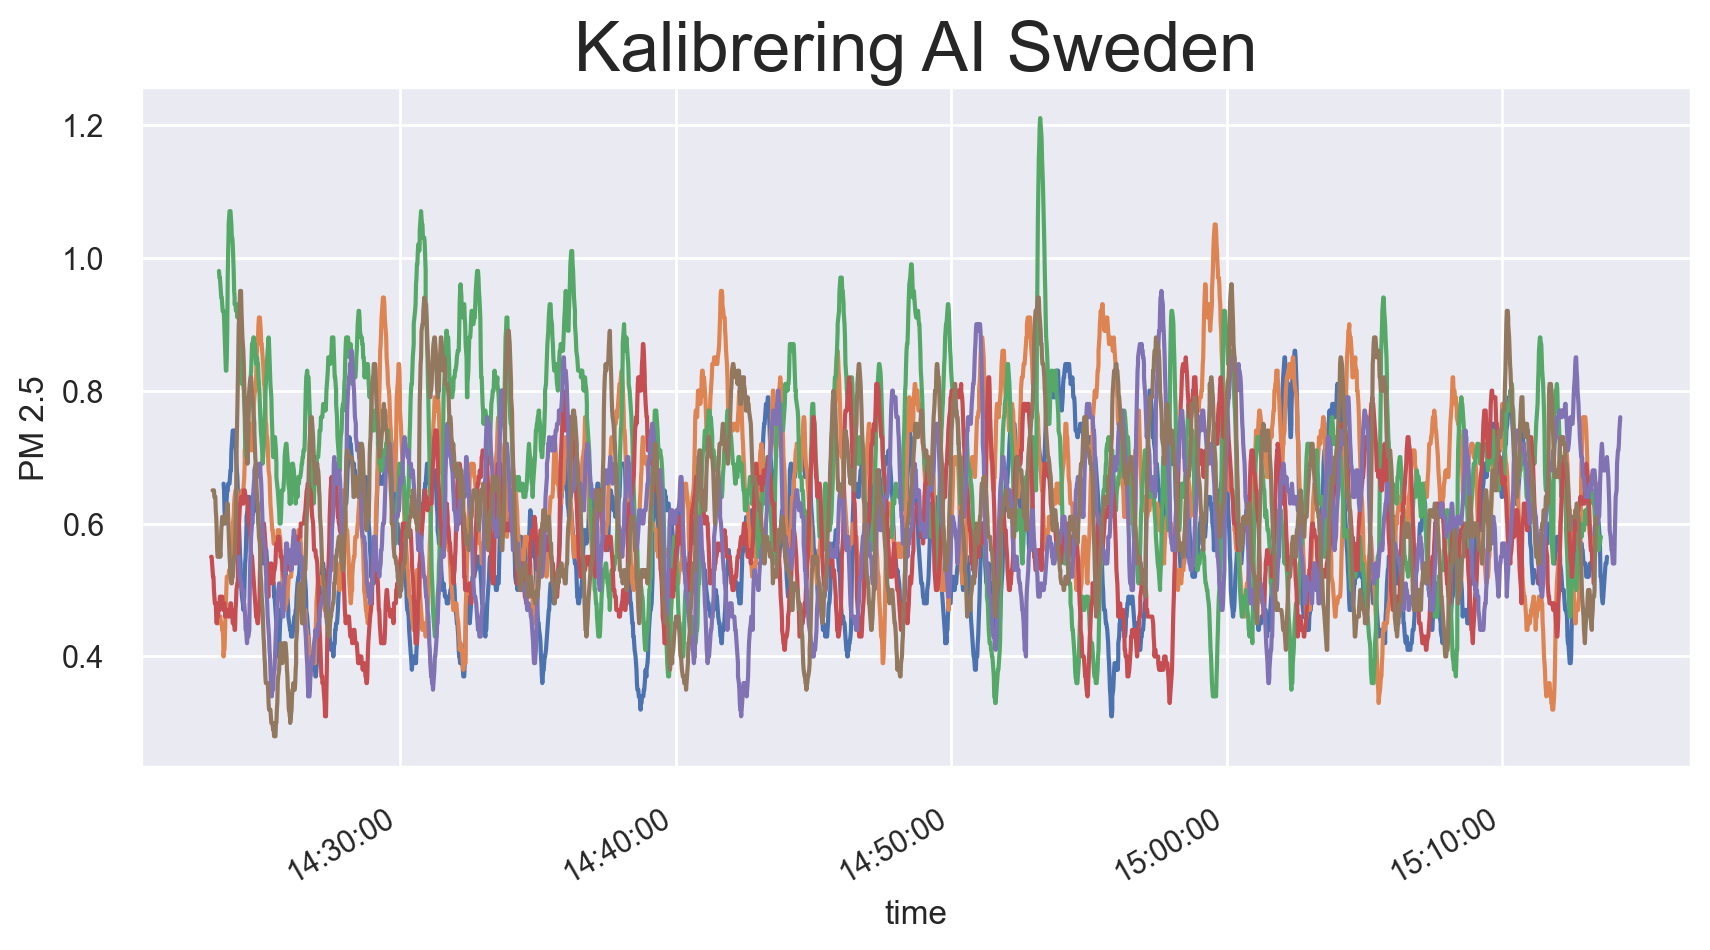

In [172]:
# Plot
fig, ax = plt.subplots(dpi=200, figsize = (10, 5))

for i, df in enumerate(calibrate_dfs):
    ax.plot(df['Timestamp'], df['PM2.5'], label=f'Sensor {labels[i]}')

# Label axis
ax.set_title('Kalibrering AI Sweden', fontsize=25)
ax.set_xlabel('time')
ax.set_ylabel('PM 2.5')

# Format time on x-axis
plt.gcf().autofmt_xdate()
myFmt = dates.DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_formatter(myFmt)

# Show
plt.show()

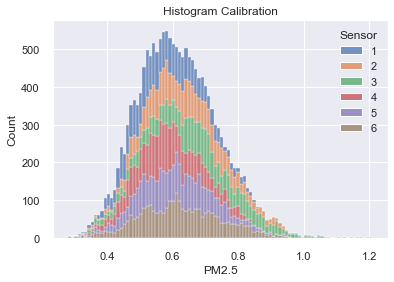

In [174]:
sns.histplot(calibrate_df, x='PM2.5', hue='Sensor', multiple='stack', bins=94) # keeper # det ser ut som en igelkott - Alicia
plt.title('Histogram Calibration')

plt.savefig('figures/PaperV1/Calibration/histogram.pdf', dpi=300)

0.14592551978626772
0.29185103957253544


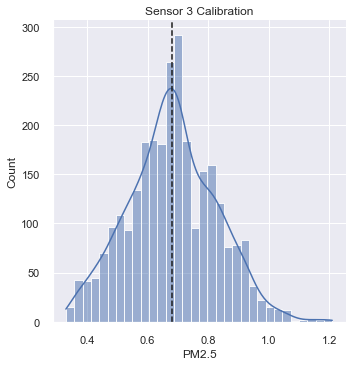

In [180]:
s = 2

mean = calibrate_dfs[s]['PM2.5'].mean()
std = calibrate_dfs[s]['PM2.5'].std()
N = len(calibrate_dfs[s])

label = calibrate_dfs[s]['Sensor'].values[0]

mean_std = std / np.sqrt(N)

print(std)
print(2 * std)

sns.displot(calibrate_dfs[s], x='PM2.5', kde=True)
plt.title(f'Sensor {label} Calibration')
plt.axvline(mean, c='k', linestyle='--')

In [176]:
calibrate_dfs[0]['Sensor'].values[0]

'1'

In [179]:
# STATS: HOW MANY MINUTES?
measurement_period = calibrate_df['Timestamp'].max() - calibrate_df['Timestamp'].min()

unique_measurements = calibrate_df.groupby('Sensor').agg({'Timestamp': 'nunique'}).reset_index()

print(measurement_period)

unique_measurements.head()

0 days 00:51:08


Sensor  Timestamp
0      1       2714
1      2       2699
2      3       2709
3      4       2705
4      5       2706

In [187]:
# AVG Quality
median_df = calibrate_df.groupby('Sensor').agg({'PM2.5': 'median'}).reset_index()
mean_AI = median_df['PM2.5'].mean()

print(f'La grande totale mean: {calibrate_df["PM2.5"].mean()}')
print(f'La grande totale median: {calibrate_df["PM2.5"].median()}')
print(f'La grande totale median + mean: {mean_AI}')


La grande totale mean: 0.6168408551068884
La grande totale median: 0.61
La grande totale median + mean: 0.61


In [189]:
# Get mean, min, and max for all sensor values
group_df = calibrate_df.groupby('Timestamp').agg({'PM2.5': ['mean', 'min', 'max']}).reset_index()

# Average distance between smallest recorded value and highest recorded value for different sensors at every measurement point
mean_diff = np.mean(group_df['PM2.5']['max'] - group_df['PM2.5']['min'])
print(mean_diff)

0.2968275187479622


In [206]:
total_diff_all_sensors = calibrate_df['PM2.5'].max() - calibrate_df['PM2.5'].min()

stat_df = calibrate_df.groupby('Sensor').agg({'PM2.5': ['min', 'max', 'mean', 'median', 'std']}).reset_index()

stat_df['diff'] = stat_df['PM2.5']['max'] - stat_df['PM2.5']['min'] # sensor 3 verkar diffa mest

mean_diff = stat_df['diff'].mean()
mean_std = stat_df['PM2.5']['std'].mean()

print(f'Mean diff sensor: {mean_diff}')
print(f'Largest diff across all measurements and sensors: {total_diff_all_sensors}')
print(f'Mean std: {mean_std}')

stat_df

Mean diff sensor: 0.6733333333333333
Largest diff across all measurements and sensors: 0.9299999999999999
Mean std: 0.11860494867513204


Sensor PM2.5                                   diff
           min   max      mean median       std      
0      1  0.31  0.86  0.570914   0.56  0.105410  0.55
1      2  0.32  1.05  0.641293   0.64  0.123486  0.73
2      3  0.33  1.21  0.680662   0.68  0.145926  0.88
3      4  0.31  0.87  0.582613   0.57  0.101945  0.56
4      5  0.31  0.95  0.603684   0.60  0.109201  0.64
5      6  0.28  0.96  0.621913   0.61  0.125662  0.68